In [7]:
import pandas as pd


In [8]:
df1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Salvador.xlsx")

In [10]:
df = pd.concat([df1,df2,df3,df4,df5]) #para unificar as tabelas

In [11]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [12]:
df.tail() #mostra as ultimas linhas

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [13]:
df.sample(5) #mostra 5 linhas aleatorias

,Cidade,Data,Vendas,LojaID,Qtde
86,Recife,2019-01-01,17.83,982,8
4,Recife,2019-02-14,19.89,983,7
15,Fortaleza,2019-01-01,195.05,1002,2
112,Natal,2019-01-02,43.00,1036,3
184,Salvador,2019-01-02,167.16,1037,1


In [14]:
df.dtypes #verificar o tipo de dado de cada coluna

,0
Cidade,object
Data,datetime64[ns]
Vendas,float64
LojaID,int64
Qtde,int64


In [15]:
df["LojaID"] = df["LojaID"].astype("object") #alterar o tipo de dado da coluna

In [16]:
df.dtypes

,0
Cidade,object
Data,datetime64[ns]
Vendas,float64
LojaID,object
Qtde,int64


In [17]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [18]:
df.isnull().sum() #verificar se há valores nulos

,0
Cidade,0
Data,0
Vendas,0
LojaID,0
Qtde,0


In [19]:
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True) #preencher os valores nulos com a média

In [20]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [21]:
df["Vendas"].fillna(0, inplace=True) #preencher os valores nulos com 0

In [22]:
df.dropna(inplace=True) #remover as linhas com valores nulos

In [23]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [24]:
df.dropna(subset=["Vendas"], inplace=True) #remover as linhas com valores nulos em uma coluna especifica

In [25]:
df.dropna(how="all", inplace=True) #remover as linhas com valores nulos em todas as colunas

criando coluna

In [27]:
df["Receita"] = df["Vendas"].mul(df["Qtde"]) #criar uma coluna com o valor total de vendas


In [28]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [29]:
df["Receita"].max() #mostrar o maior valor da coluna

3544.0

In [30]:
df["Receita"].min() #mostrar o menor valor da coluna

3.34

In [31]:
df.nlargest(3, "Receita") #mostrar as 3 maiores receitas


,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0


In [32]:
df.nsmallest(3, "Receita") #mostrar as 3 menores receitas

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
65,Recife,2019-01-01,4.01,981,1,4.01


In [33]:
df.groupby("Cidade")["Receita"].sum() #mostrar o valor total de vendas por cidade

,Receita
Cidade,
Aracaju,48748.25
Fortaleza,75827.94
Natal,334455.04
Recife,103873.02
Salvador,81193.46


In [34]:
df.sort_values("Receita", ascending=False).head(10) #mostrar as 10 maiores receitas do maior para o menor

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
41,Natal,2018-05-20,835.0,852,4,3340.0


Trabalhando com datas

In [35]:
df["Data"] = df["Data"].astype("int64") #alterar o tipo de dado da coluna

In [37]:
df.dtypes

,0
Cidade,object
Data,int64
Vendas,float64
LojaID,object
Qtde,int64
Receita,float64


In [39]:
# Convert 'Data' column back to datetime
df["Data"] = pd.to_datetime(df["Data"])

# Now you can use the .dt accessor
df.groupby(df["Data"].dt.year)["Receita"].sum() #mostrar o valor total de vendas por ano

,Receita
Data,
2018,190076.77
2019,454020.94


In [40]:
df["Ano_Venda"] = df["Data"].dt.year #criar uma coluna com o ano da venda

In [41]:
df["Mes_Venda"] = df["Data"].dt.month #criar uma coluna com o mês da venda

In [42]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda
33,Salvador,2019-01-01,144.19,1035,2,288.38,2019,1
203,Salvador,2019-01-02,37.75,1035,2,75.50,2019,1
60,Recife,2019-01-01,37.97,983,1,37.97,2019,1
85,Fortaleza,2019-01-01,149.00,1005,3,447.00,2019,1
72,Salvador,2019-01-01,149.47,1036,3,448.41,2019,1


In [43]:
df["Data"].min() #mostrar a data mais antiga

Timestamp('2018-01-01 00:00:00')

In [44]:
df["diferenca_dias"] = df["Data"] - df["Data"].min() #criar uma coluna com a diferença de dias entre a data mais antiga e a data da venda

In [45]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,diferenca_dias
226,Salvador,2019-01-02,38.32,1035,2,76.64,2019,1,366 days
59,Salvador,2019-01-01,138.27,1034,2,276.54,2019,1,365 days
140,Fortaleza,2019-03-02,166.89,983,5,834.45,2019,3,425 days
118,Natal,2019-01-02,92.21,1035,2,184.42,2019,1,366 days
65,Fortaleza,2019-01-01,145.20,1005,2,290.40,2019,1,365 days


In [46]:
df["trimestre_venda"] = df["Data"].dt.quarter #criar uma coluna com o trimestre da venda

In [47]:
df.sample(5)
#

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,diferenca_dias,trimestre_venda
75,Recife,2019-01-01,170.29,981,8,1362.32,2019,1,365 days,1
43,Aracaju,2018-01-01,19.63,1523,9,176.67,2018,1,0 days,1
42,Natal,2019-03-02,775.00,854,2,1550.00,2019,3,425 days,1
67,Fortaleza,2019-01-01,43.51,1003,1,43.51,2019,1,365 days,1
103,Aracaju,2018-01-01,12.62,1522,3,37.86,2018,1,0 days,1


In [48]:
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)] #mostrar as vendas de março de 2019

In [49]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,425 days,1
...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,425 days,1


Visualiação de dados


In [50]:
df["LojaID"].value_counts(ascending=False) #mostrar a quantidade de vendas por loja

,count
LojaID,
1036,234
1035,224
1037,202
1034,134
983,130
982,88
980,72
981,62
1005,60


<Axes: xlabel='LojaID'>

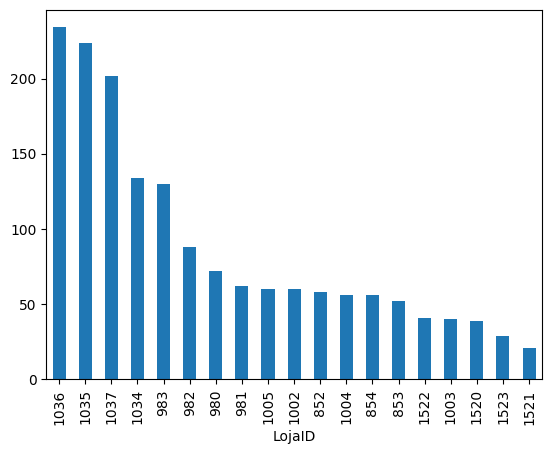

In [52]:
df["LojaID"].value_counts(ascending=False).plot.bar() #mostrar a quantidade de vendas por loja em um gráfico de barras

<Axes: ylabel='LojaID'>

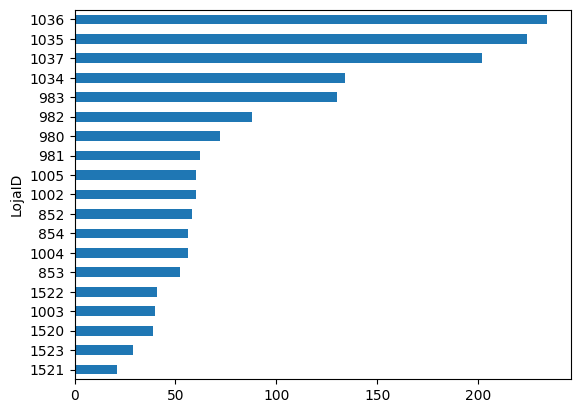

In [57]:
df["LojaID"].value_counts(ascending=True).plot.barh() #mostrar a quantidade de vendas por loja em um gráfico de barras horizontal

<Axes: ylabel='Receita'>

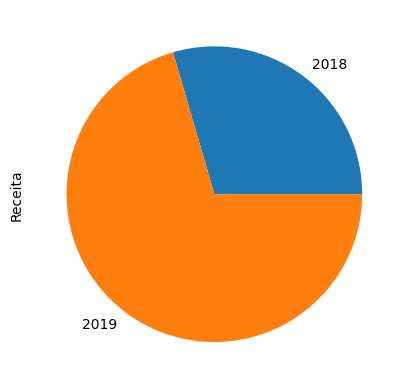

In [59]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie() #mostrar o valor total de vendas por ano em um pizza

In [60]:
df["Cidade"].value_counts() #mostrar a quantidade de vendas por cidade

,count
Cidade,
Natal,480
Salvador,480
Fortaleza,284
Recife,284
Aracaju,130


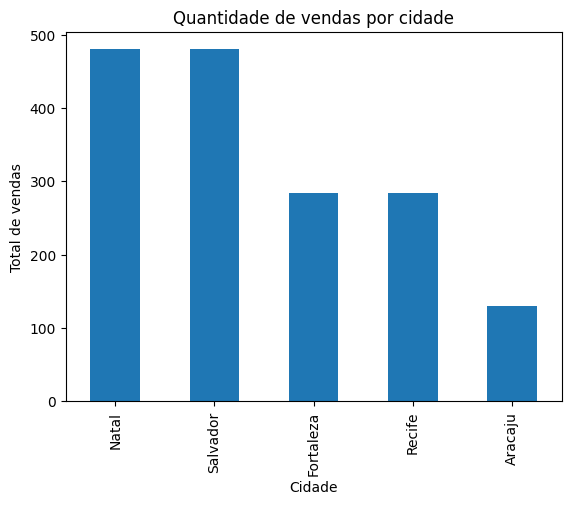

In [61]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Quantidade de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas")
plt.show()

In [68]:
plt.style.use("ggplot")

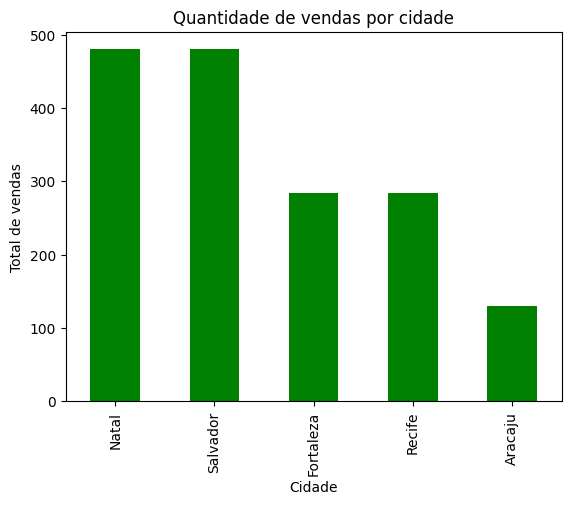

In [64]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Quantidade de vendas por cidade", color="green")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas")
plt.show()

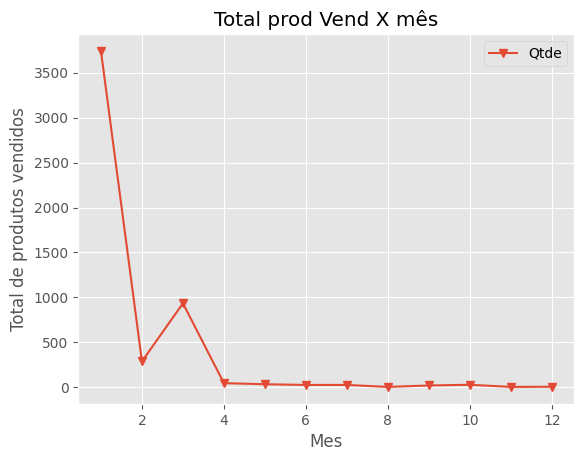

In [73]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(marker="v", title="Total prod Vend X mês")
plt.xlabel("Mes")
plt.ylabel("Total de produtos vendidos")
plt.legend()
plt.show()

In [74]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

,Qtde
Mes_Venda,
1,3742
2,288
3,934
4,46
5,34
6,26
7,26
8,4
9,20


In [75]:
df_2019 = df[df["Ano_Venda"] == 2019] #criar um dataframe com as vendas de 2019

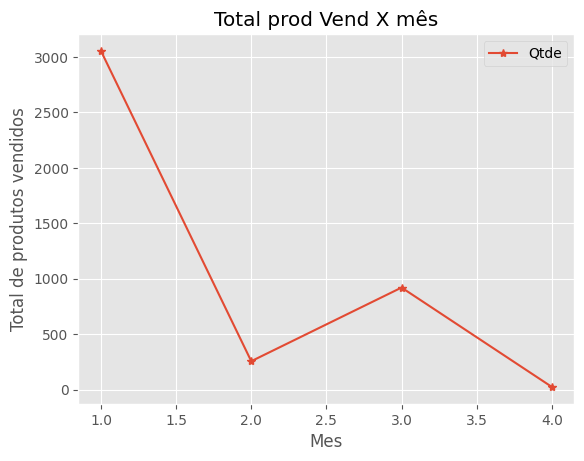

In [78]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="*", title="Total prod Vend X mês")
plt.xlabel("Mes")
plt.ylabel("Total de produtos vendidos")
plt.legend();

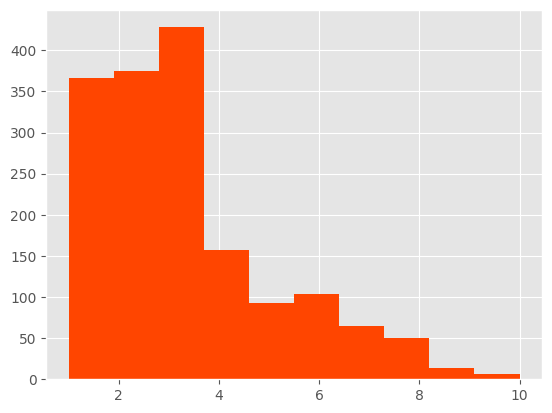

In [79]:
plt.hist(df["Qtde"], color="orangered")
plt.show()

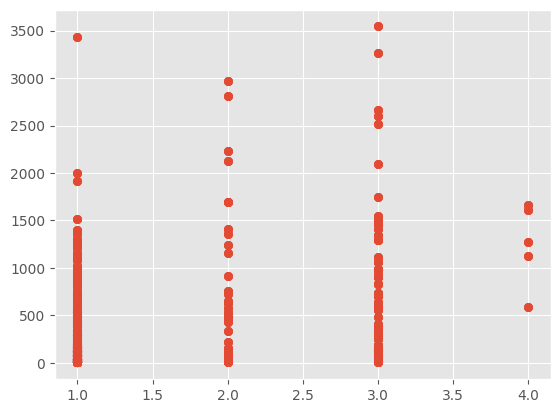

In [84]:
plt.scatter(x=df_2019["Mes_Venda"], y=df_2019["Receita"])

In [85]:
# Check if 'Dia_Venda' is in the DataFrame columns
print(df_2019.columns)



Index(['Cidade', 'Data', 'Vendas', 'LojaID', 'Qtde', 'Receita', 'Ano_Venda',
       'Mes_Venda', 'diferenca_dias', 'trimestre_venda'],
      dtype='object')


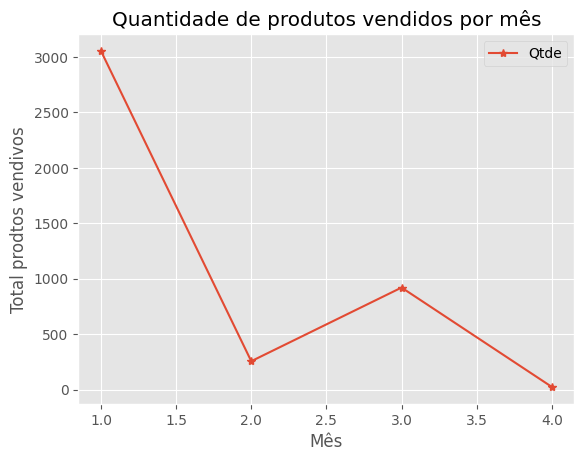

In [92]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="*")
plt.title("Quantidade de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total prodtos vendivos")
plt.legend()
plt.savefig("grafico QTDE X MES.png")
#   para salvar gráfigo